# Demand prediction of bike using MLR

The company we are working for is named Lyft INc which operates majorly in US and Minorly in Canada. It wants us to predict the demand for the number of bikes required. It is dependent on a numbr of  variables like weather conditions, time etc. 
We will answer questions like:
1.At what time or day is there more demand?
2.What factors affect demand?
3.Which weather condtions are ideal for demand? 
The method we are going to use are Multiple Linear Regression technique.

**Step 1: Setting up the work environment**

We are going to download the necessary packages for our work. We are going to view the dataset and check the datatypes.

In [1]:
pip install notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [2]:
#installing packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import os
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from pandas import Series;  from numpy.random import randn
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as lgr

from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
#downloading the file
lyft= pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\Lyftdataset.csv")
lyft.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#examining the dataset
lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#examining the dataset
lyft.shape

(17379, 17)

**Step 2: Data cleaning**

In this step, we are going to clean our dataset. We are going to look for null values and replace them with mean and mode. 
We are going to modify some variables if it is necessary and change datatypes for better analysis. We will also remove outliers from the dataset.  Outliers hamper the machine learning algorithms and hence they have to be removed.

In [6]:
#checking null values 
lyft.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#checking if registered and casual add up or not
np.sum((lyft.casual + lyft.registered) != lyft.cnt)


0

In [9]:
#checking if month and hour values are logical or not
print(lyft.mnth.unique())
print(lyft.hr.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [13]:
#dropping useless columns
lyft1=lyft.drop(['casual', 'registered', 'dteday', 'instant'], axis=1).copy()
lyft1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


**Univariate analysis**

We are using boxplot,histogram and plot to find the outliers,extreme values and distribution of the numerical variables. 

<AxesSubplot:ylabel='Density'>

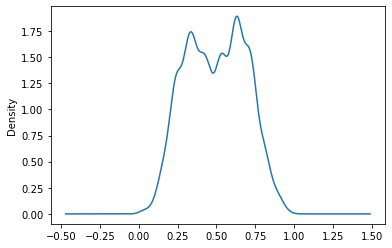

In [14]:
#checking distribution for temp
lyft1.temp.plot.density()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

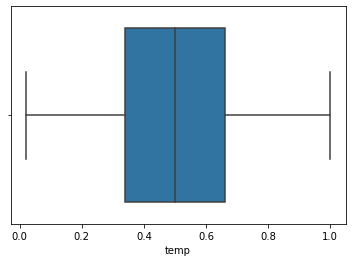

In [15]:
#checking outliers using boxplot
sb.boxplot(lyft1.temp)

<AxesSubplot:ylabel='Frequency'>

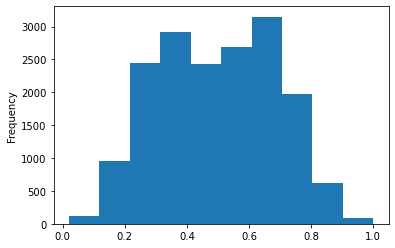

In [16]:
#using histogram to see abnormally high values
lyft1.temp.plot.hist()

<AxesSubplot:ylabel='Density'>

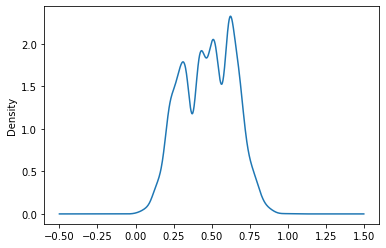

In [17]:
#checking distribution for atemp
lyft1.atemp.plot.density()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

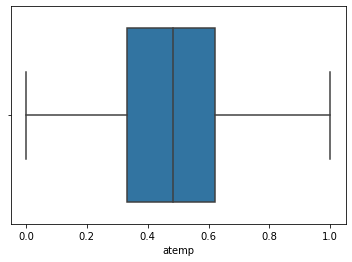

In [18]:
#checking outliers using boxplot
sb.boxplot(lyft1.atemp)

<AxesSubplot:ylabel='Frequency'>

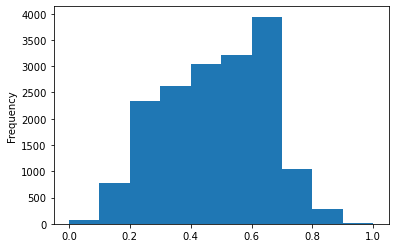

In [19]:
#using histogram to see abnormally high values
lyft1.atemp.plot.hist()

<AxesSubplot:ylabel='Density'>

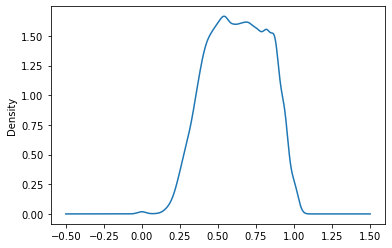

In [20]:
#checking distribution for hum
lyft1.hum.plot.density()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

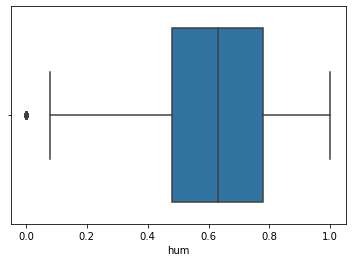

In [21]:
#checking outliers using boxplot
sb.boxplot(lyft1.hum)

<AxesSubplot:ylabel='Frequency'>

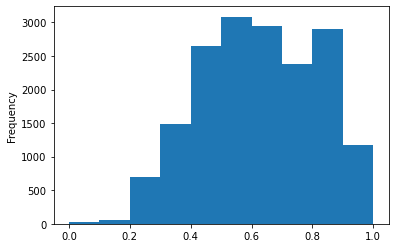

In [22]:
#using histogram to see abnormally high values
lyft1.hum.plot.hist()


<AxesSubplot:ylabel='Density'>

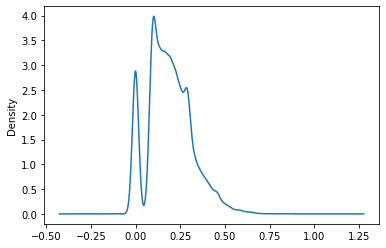

In [23]:
#checking distribution for windspeed
lyft1.windspeed.plot.density()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

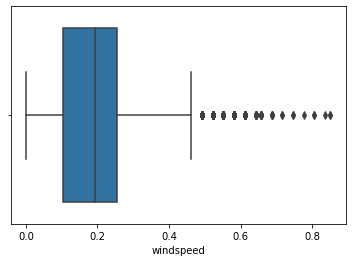

In [24]:
#checking outliers using boxplot
sb.boxplot(lyft1.windspeed)

<AxesSubplot:ylabel='Frequency'>

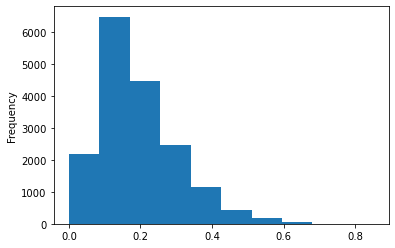

In [25]:
#using histogram to see abnormally high values
lyft1.windspeed.plot.hist()


<AxesSubplot:ylabel='Density'>

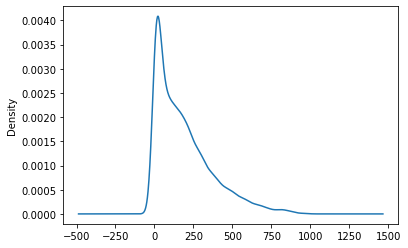

In [26]:
#checking distribution for cnt
lyft1.cnt.plot.density()

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

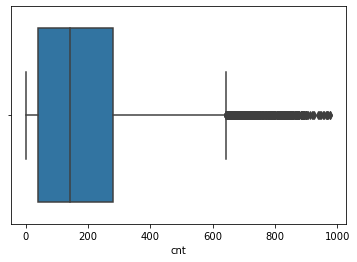

In [27]:
#checking outliers using boxplot
sb.boxplot(lyft1.cnt)

<AxesSubplot:ylabel='Frequency'>

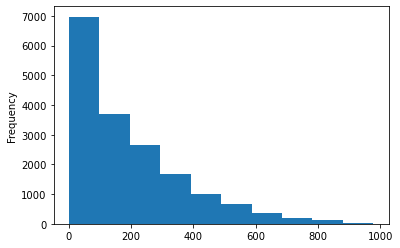

In [28]:
#using histogram to see abnormally high values
lyft1.cnt.plot.hist()

In [29]:
#outlier treatment for variable hum 
lyft1.hum.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])


0.10    0.37
0.25    0.48
0.50    0.63
0.70    0.75
0.90    0.88
0.95    0.93
0.99    1.00
Name: hum, dtype: float64

In [33]:
#dropping the outliers
lyft2 = lyft1[lyft1.hum > 0.1].copy()
print("old length:",len(lyft1))
print("new length:",len(lyft2))
print("outliers dropped:",len(lyft1)-len(lyft2))

old length: 17379
new length: 17355
outliers dropped: 24


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

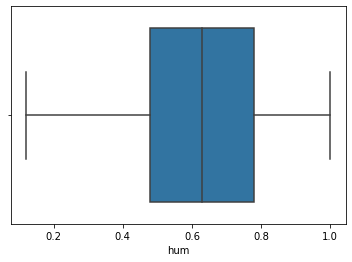

In [34]:
#checking if outliers gone
sb.boxplot(lyft2.hum)

In [35]:
#outlier treatment for variable windspeed 
lyft2.windspeed.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])


0.10    0.0000
0.25    0.1045
0.50    0.1940
0.70    0.2537
0.90    0.3582
0.95    0.4179
0.99    0.5224
Name: windspeed, dtype: float64

In [37]:
#dropping the outliers
lyft2a = lyft2[lyft2.windspeed < 0.4179].copy()
print("old length:",len(lyft2))
print("new length:",len(lyft2a))
print("outliers dropped:",len(lyft2)-len(lyft2a))

old length: 17355
new length: 16396
outliers dropped: 959


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

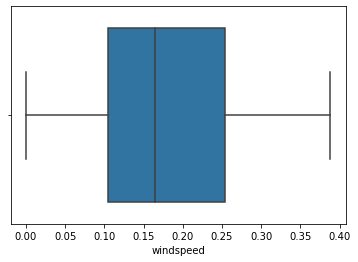

In [39]:
#checking if outliers gone
sb.boxplot(lyft2a.windspeed)

In [40]:
#outlier treatment for variable windspeed 
lyft2a.cnt.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10      9.00
0.25     39.00
0.50    141.00
0.70    245.00
0.90    452.00
0.95    563.00
0.99    784.05
Name: cnt, dtype: float64

In [41]:
#dropping the outliers
lyft2b = lyft2a[lyft2a.cnt < 563].copy()
print("old length:",len(lyft2a))
print("new length:",len(lyft2b))
print("outliers dropped:",len(lyft2a)-len(lyft2b))


old length: 16396
new length: 15571
outliers dropped: 825


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

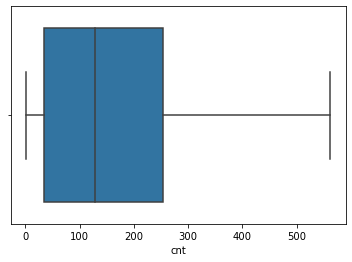

In [42]:
#checking if outliers gone
sb.boxplot(lyft2b.cnt)

**Step 3:Exploratory data analysis**

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate analysis and check for correlation between variables.  


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

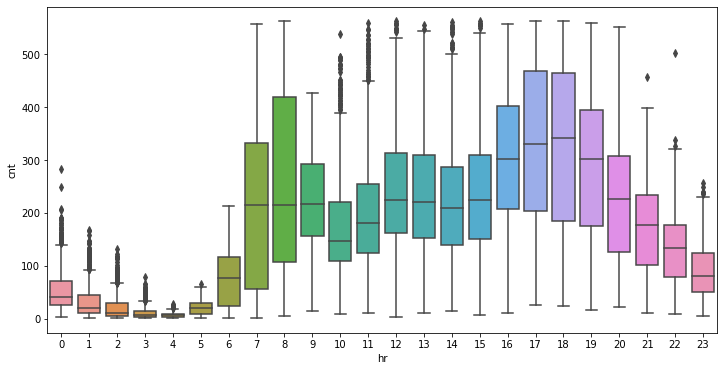

In [90]:
#box plot for cnt vs hr
plt.figure(figsize=[12,6])
sb.boxplot("hr", "cnt", data=lyft2b)


In [91]:
#checking if demand differs according to the hour of the day
mod = ols("cnt ~ hr", data = lyft2b).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
hr,1.0,6.107687e+07,6.107687e+07,3671.150829,0.0
Residual,15569.0,2.590212e+08,1.663698e+04,NaN,NaN


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

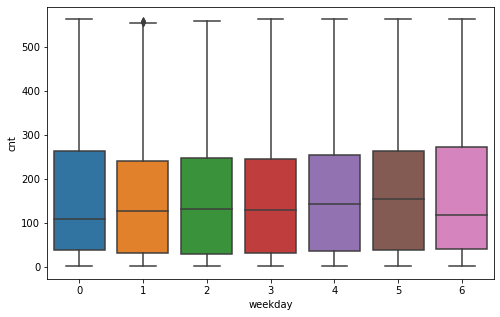

In [46]:
#cnt vs weekday
plt.figure(figsize=[8,5])
sb.boxplot("weekday", "cnt", data=lyft2b)


In [92]:
#checking if demand differs according to the weekday
mod = ols("cnt ~ weekday", data = lyft2b).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
weekday,1.0,2.151308e+05,215130.83900,10.470618,0.001215
Residual,15569.0,3.198829e+08,20546.14528,NaN,NaN


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

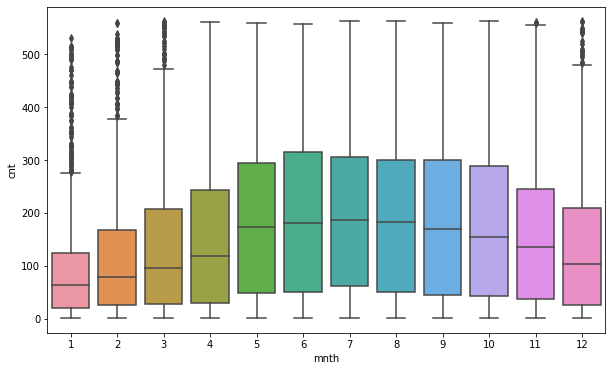

In [48]:
#cnt vs month
plt.figure(figsize=[10,6])
sb.boxplot("mnth", "cnt", data=lyft2b)

In [93]:
#checking if demand differs according to the month
mod = ols("cnt ~ mnth", data = lyft2b).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
mnth,1.0,4.311260e+06,4.311260e+06,212.554813,7.864329e-48
Residual,15569.0,3.157868e+08,2.028305e+04,NaN,NaN


C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

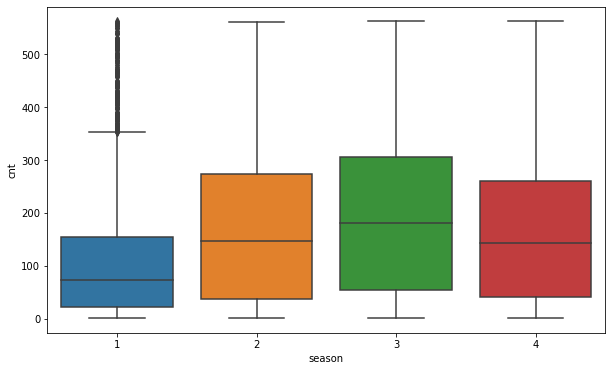

In [49]:
#season vs cnt 
plt.figure(figsize=[10,6])
sb.boxplot("season", "cnt", data=lyft2b)


In [94]:
#checking if demand differs according to the season
mod = ols("cnt ~ season", data = lyft2b).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,9.024545e+06,9.024545e+06,451.671827,7.874838e-99
Residual,15569.0,3.110735e+08,1.998031e+04,NaN,NaN


In [57]:
#summary stats
lyft2b.describe().round(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00,15571.00
mean,2.51,0.48,6.57,11.27,0.03,2.99,0.68,1.43,0.49,0.47,0.64,0.17,162.83
std,1.11,0.50,3.45,7.05,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.10,143.38
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.13,0.00,1.00
25%,2.00,0.00,4.00,5.00,0.00,1.00,0.00,1.00,0.34,0.33,0.49,0.10,35.00
50%,3.00,0.00,7.00,11.00,0.00,3.00,1.00,1.00,0.50,0.48,0.65,0.16,129.00
75%,3.00,1.00,10.00,18.00,0.00,5.00,1.00,2.00,0.64,0.62,0.80,0.25,254.00
max,4.00,1.00,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.39,562.00


In [110]:
#creating bins
bins = np.linspace(min(lyft2b["cnt"]), max(lyft2b["cnt"]), 6)
bins
group_names = ['Low','mid-low', 'Medium','mid-high', 'High']
lyft2b["Demand-levels"] = pd.cut(lyft2b["cnt"], bins, labels=group_names, include_lowest=True )
lyft2b[['cnt','Demand-levels']].head(20)

,cnt,Demand-levels
0,16,Low
1,40,Low
2,32,Low
3,13,Low
4,1,Low
5,1,Low
6,2,Low
7,3,Low
8,8,Low
9,14,Low


In [111]:
#demand distribution
demand_count=lyft2b["Demand-levels"].value_counts()
print(demand_count)

Low         7191
mid-low     3763
Medium      2427
mid-high    1356
High         834
Name: Demand-levels, dtype: int64


Text(0.5, 1.0, 'Demand bins')

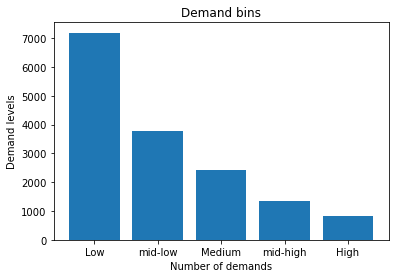

In [112]:
# Distribution visualized
plt.bar(group_names, lyft2b["Demand-levels"].value_counts())
plt.xlabel("Number of demands")
plt.ylabel("Demand levels")
plt.title("Demand bins")

In [113]:
#checking correlation of independent variables with dependent 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
corrs = lyft2b[num_vars].corr()
corrs.round(2)

,temp,atemp,hum,windspeed,cnt
temp,1.00,0.99,-0.06,0.00,0.40
atemp,0.99,1.00,-0.05,-0.03,0.39
hum,-0.06,-0.05,1.00,-0.24,-0.33
windspeed,0.00,-0.03,-0.24,1.00,0.11
cnt,0.40,0.39,-0.33,0.11,1.00


<AxesSubplot:>

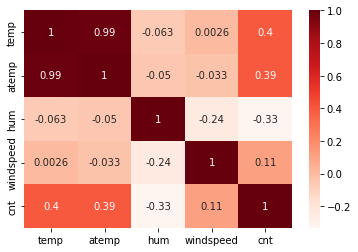

In [60]:
#heatmap of correlation
sb.heatmap(corrs, annot=True, cmap="Reds")

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt'>

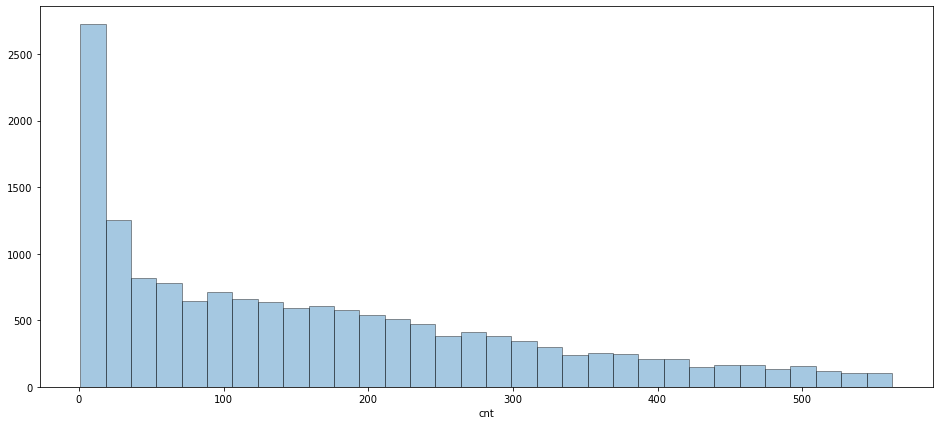

In [109]:
#Seeing demand distribution 
plt.figure(figsize=(16,7))
sb.distplot(lyft2b['cnt'], kde = False,hist_kws=dict(edgecolor="k"))

**Findings**

1.	Demand for bikes is mostly low to medium on most days so need to stock more bikes as it would lead to high maintenance costs and too much unused inventory. 
2.	Demand for bikes are negatively affected by humidity and positively affected by temperature and windspeed which implies people like to cycle on moderate windy and summer times. 
3.	People mostly like to cycle on the weekends so on weekends the stock should be high. 
4.	People have high demand for bikes at around 7 to 8 AM and 5 to 7 PM, therefore we can say people like to workout in the morning and evenings.
5.	The demand is lowest in the winter months.


**Step 4: Model building**

A linear regression model is going to be built in order to predict the rating of the app which is the dependent variable. The categorical variables will be converted into numerical using dummy variables method. The algorithm will predict the rating of an application.

In [63]:
#renaming the dataset
lyft3=lyft2b.copy()
lyft3.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [68]:
#creating month dummy variable
lyft3.mnth[lyft3.mnth.isin([5,6,7,8,9])] = 5
np.unique(lyft3.mnth)


C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_2688\4049091657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft3.mnth[lyft3.mnth.isin([5,6,7,8,9])] = 5


array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [69]:
#getting dummies for hr 
lyft3.hr[lyft3.hr.isin([0,1,2,3,4,5])] = 0
lyft3.hr[lyft3.hr.isin([11,12,13,14,15])] = 11

np.unique(lyft3.hr)


C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_2688\2893508931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft3.hr[lyft3.hr.isin([0,1,2,3,4,5])] = 0
C:\Users\sujoydutta\AppData\Local\Temp\ipykernel_2688\2893508931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft3.hr[lyft3.hr.isin([11,12,13,14,15])] = 11


array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [70]:
#getting dummies for for season, weathersit, weekday, mnth, hr. 
cat_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
lyft3 = pd.get_dummies(lyft3, columns=cat_cols, drop_first=True)
lyft3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [71]:
#train test split
df_train, df_test = train_test_split(lyft3, train_size = 0.7, random_state = 100)

In [72]:
#separation of X and Y 
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test


In [77]:
#initializing model and fitting 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [82]:
#Reporting R2 

y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred).round(2)


0.67

In [83]:
#prediction on test set
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred).round(2)


0.66

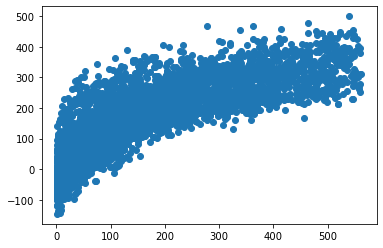

In [84]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

C:\Users\sujoydutta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

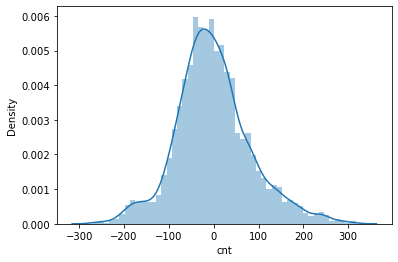

In [85]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

In [89]:
#coefficients 
cdf = pd.DataFrame(data = lr.coef_, index = X_train.columns, columns = ['Coefficients'])
cdf

,Coefficients
yr,5.923041e+01
holiday,-3.700780e+13
workingday,-3.700780e+13
temp,5.497473e+01
atemp,1.443868e+02
hum,-6.158398e+01
windspeed,-1.526611e+00
season_2,2.806348e+01
season_3,1.426953e+01
season_4,5.448926e+01


In [115]:
#seeing predicted values
y_test_pred[0:10].round()

array([136.,  94.,  98.,  65., 115., 190., 148., 295., 186., 228.])

In [108]:
mse = mean_squared_error(y_test,y_test_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  7081.443690754819


**Conclusion**

The model is moderately well as it is able to explain almost 66% of the phenomenon. The fit has been achieved but however if more variables were there the fit would have been better. 